In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [9]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4845 non-null   object
 1   News Headline  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [11]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [13]:
df['Sentiment'].value_counts()

neutral     2878
positive    1363
negative     604
Name: Sentiment, dtype: int64

Feature extraction:

In [14]:
y=df['Sentiment'].values
y.shape

(4845,)

In [20]:
x=df['News Headline'].values
x.shape

(4845,)

Train-test split:

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1938,)

In [23]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [24]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [25]:
df_train.head()

,news,sentiment
0,"( ADPnews ) - Nov 9 , 2009 - Four companies ha...",positive
1,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive
2,"ALEXANDRIA , Va. , March 28 -- Pertti Salmi an...",neutral
3,Lee & Man Paper and Metso have a long and pros...,positive
4,Finnish Metso Paper has been awarded a contrac...,positive


In [26]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [27]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [28]:
df_test.head()

,news,sentiment
0,"In addition to the Indian market , the new pla...",positive
1,"Nokia , which has a strong track record in the...",positive
2,Finnish communication electronics components s...,neutral
3,According to the Finnish-Russian Chamber of Co...,positive
4,The new plant is planned to have an electricit...,positive


Basic pre-processing of train and test data

In [29]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [31]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [32]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,ADPnews Nov 9 2009 Four companies have ag...,positive
1,ADP News Nov 6 2008 Finnish retail software...,positive
2,ALEXANDRIA Va March 28 Pertti Salmi and Han...,neutral
3,Lee Man Paper and Metso have a long and prosp...,positive
4,Finnish Metso Paper has been awarded a contrac...,positive


In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Code to generate n-grams

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [34]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [35]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

Creating unigrams:

In [36]:
from collections import defaultdict

In [37]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [38]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Nov', '9', '', '2009', '', 'Four', 'companies', 'agreed', 'buy', 'combined', 'SEK', '59', 'billion', '', 'USD', '854mEUR', '5718', '', 'drug', 'stores', 'offered', 'sale', 'part', 'restructuring', 'Swedish', 'statedowned', 'pharmacy', 'monopoly', 'Apoteket', 'AB', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Nov', '6', '', '2008', '', 'Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'OMX', '', 'ALD1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '21', 'million', 'USD', '27', 'first', 'nine', 'months', '2008', 'versus', 'net', 'loss', 'EU']
Sentence after removing stopwords: ['Lee', '', 'Man', 'Paper', 'Metso', 'long', 'prosperous', 'cooperation', '', 'good', 'example', 'Changshu', 'Hongmei', 'kraftliner', 'machines', 'delivered', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Metso', 'Paper', 'awarded', 'contract', 'rebuild', 'Sabah', 'Forest', 'Industries', '', ''

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['He', 'said', 'losing', 'five', 'families', 'month', 'economy', 'many', 'make', 'alternative', 'arrangements', 'save', 'money', '']
Sentence after removing stopwords: ['The', 'total', 'need', 'staff', 'cuts', 'corresponds', '300', 'manyears', '']
Sentence after removing stopwords: ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords: ['Last', 'year', '', 'UPM', 'cut', 'production', '', 'closed', 'mills', 'Finland', 'slashed', '700', 'jobs', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords: ['In', 'addition', '', 'production', 'Varpaisj', 'rvi', 'factory', 'stopped', 'beginning', 'April', '2

In [40]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'March', '28', '', 'Pertti', 'Salmi', 'Hanna', 'Vuolteenaho', '', 'Oulu', '', 'Finland', '', 'Sami', 'Viitasaari', 'Ii', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handset', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['Jussi', 'Pesonen', '', 'member', 'Sampo', 'Board', 'since', '2006', '', 'renounce', 'seat', 'Sampo', 'Board', '']
Sentence after removing stopwords: ['The', 'office', 'space', 'rise', 'remodeled', 'Cannon', 'Street', 'underground', 'station', '']
Sentence after removing stopwords: ['The', 'newspapers', 'Alma', 'Media', 'Arena', 'Partners', 'enter', 'cooperation', 'agreement', 'using', 'Alma', 'marketplace', 'services', 'respective', 'regions', '']
Sentence after removing stopwords: ['From', '2003', '', 'emphasis', 'Kyro', 'strategy', 'Glaston', 'growth', '']
Sentence after removing stopwords: ['The', 'Tekla', 'Structures', '16', 'installat

In [41]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [42]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

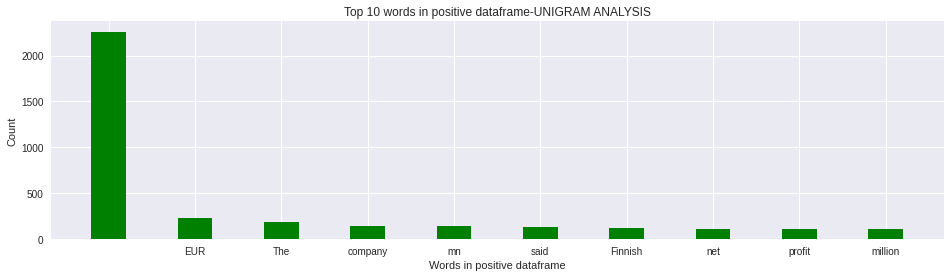

In [43]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

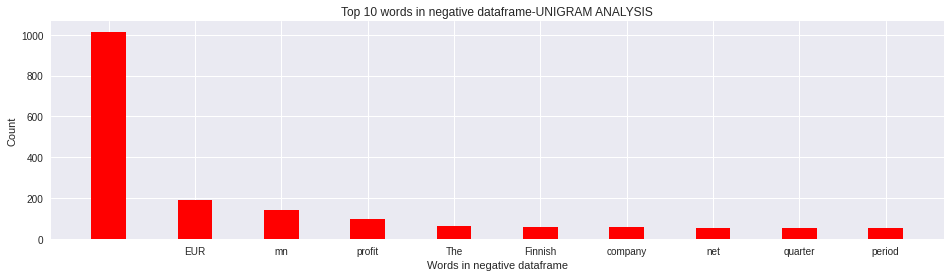

In [44]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

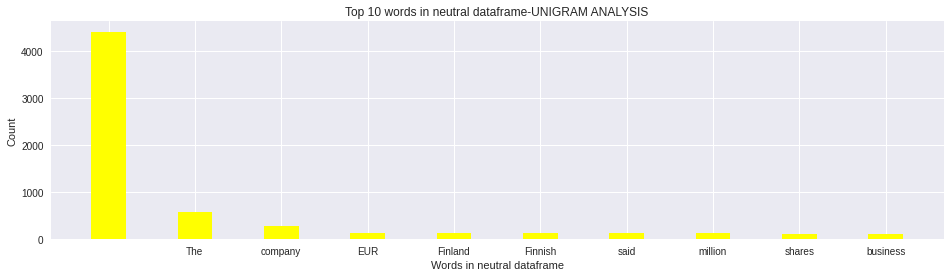

In [45]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

Creating bigrams:

In [46]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [47]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Nov', '9', '', '2009', '', 'Four', 'companies', 'agreed', 'buy', 'combined', 'SEK', '59', 'billion', '', 'USD', '854mEUR', '5718', '', 'drug', 'stores', 'offered', 'sale', 'part', 'restructuring', 'Swedish', 'statedowned', 'pharmacy', 'monopoly', 'Apoteket', 'AB', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Nov', '6', '', '2008', '', 'Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'OMX', '', 'ALD1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '21', 'million', 'USD', '27', 'first', 'nine', 'months', '2008', 'versus', 'net', 'loss', 'EU']
Sentence after removing stopwords: ['Lee', '', 'Man', 'Paper', 'Metso', 'long', 'prosperous', 'cooperation', '', 'good', 'example', 'Changshu', 'Hongmei', 'kraftliner', 'machines', 'delivered', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Metso', 'Paper', 'awarded', 'contract', 'rebuild', 'Sabah', 'Forest', 'Industries', '', ''

In [48]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['He', 'said', 'losing', 'five', 'families', 'month', 'economy', 'many', 'make', 'alternative', 'arrangements', 'save', 'money', '']
Sentence after removing stopwords: ['The', 'total', 'need', 'staff', 'cuts', 'corresponds', '300', 'manyears', '']
Sentence after removing stopwords: ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords: ['Last', 'year', '', 'UPM', 'cut', 'production', '', 'closed', 'mills', 'Finland', 'slashed', '700', 'jobs', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords: ['In', 'addition', '', 'production', 'Varpaisj', 'rvi', 'factory', 'stopped', 'beginning', 'April', '2

In [49]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'March', '28', '', 'Pertti', 'Salmi', 'Hanna', 'Vuolteenaho', '', 'Oulu', '', 'Finland', '', 'Sami', 'Viitasaari', 'Ii', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handset', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['Jussi', 'Pesonen', '', 'member', 'Sampo', 'Board', 'since', '2006', '', 'renounce', 'seat', 'Sampo', 'Board', '']
Sentence after removing stopwords: ['The', 'office', 'space', 'rise', 'remodeled', 'Cannon', 'Street', 'underground', 'station', '']
Sentence after removing stopwords: ['The', 'newspapers', 'Alma', 'Media', 'Arena', 'Partners', 'enter', 'cooperation', 'agreement', 'using', 'Alma', 'marketplace', 'services', 'respective', 'regions', '']
Sentence after removing stopwords: ['From', '2003', '', 'emphasis', 'Kyro', 'strategy', 'Glaston', 'growth', '']
Sentence after removing stopwords: ['The', 'Tekla', 'Structures', '16', 'installat

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [50]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [51]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]
 

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]
 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

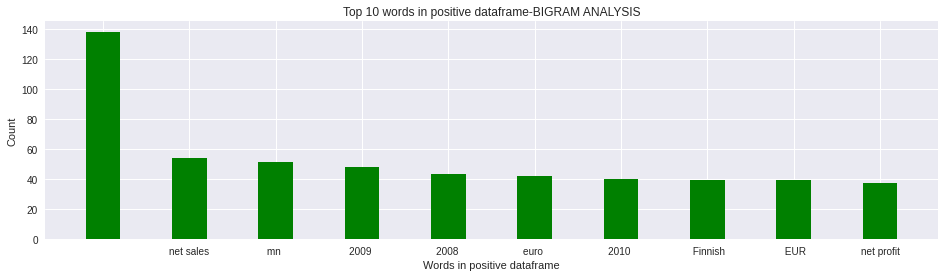

In [52]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()


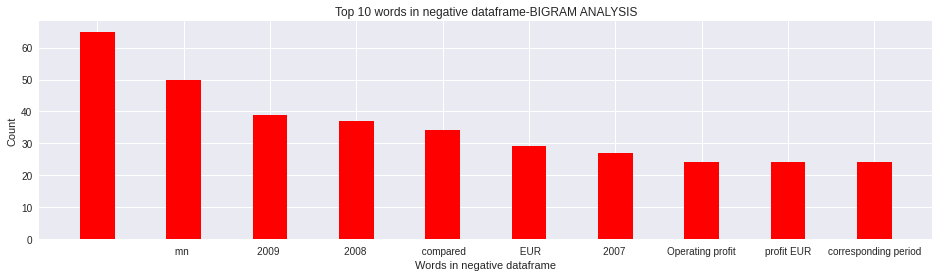

In [53]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

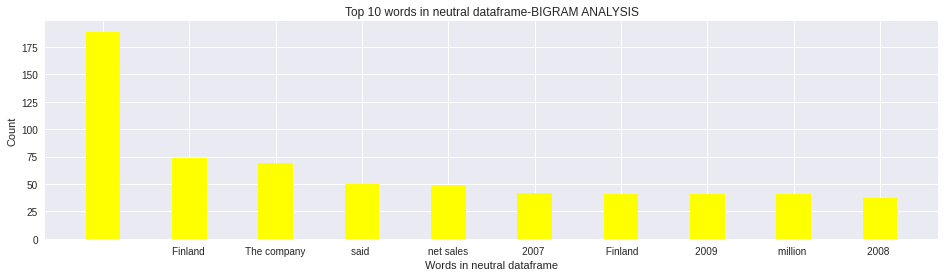

In [54]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

Creating trigrams:

In [55]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Nov', '9', '', '2009', '', 'Four', 'companies', 'agreed', 'buy', 'combined', 'SEK', '59', 'billion', '', 'USD', '854mEUR', '5718', '', 'drug', 'stores', 'offered', 'sale', 'part', 'restructuring', 'Swedish', 'statedowned', 'pharmacy', 'monopoly', 'Apoteket', 'AB', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Nov', '6', '', '2008', '', 'Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'OMX', '', 'ALD1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '21', 'million', 'USD', '27', 'first', 'nine', 'months', '2008', 'versus', 'net', 'loss', 'EU']
Sentence after removing stopwords: ['Lee', '', 'Man', 'Paper', 'Metso', 'long', 'prosperous', 'cooperation', '', 'good', 'example', 'Changshu', 'Hongmei', 'kraftliner', 'machines', 'delivered', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Metso', 'Paper', 'awarded', 'contract', 'rebuild', 'Sabah', 'Forest', 'Industries', '', ''

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['He', 'said', 'losing', 'five', 'families', 'month', 'economy', 'many', 'make', 'alternative', 'arrangements', 'save', 'money', '']
Sentence after removing stopwords: ['The', 'total', 'need', 'staff', 'cuts', 'corresponds', '300', 'manyears', '']
Sentence after removing stopwords: ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords: ['Last', 'year', '', 'UPM', 'cut', 'production', '', 'closed', 'mills', 'Finland', 'slashed', '700', 'jobs', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords: ['In', 'addition', '', 'production', 'Varpaisj', 'rvi', 'factory', 'stopped', 'beginning', 'April', '2

In [58]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'March', '28', '', 'Pertti', 'Salmi', 'Hanna', 'Vuolteenaho', '', 'Oulu', '', 'Finland', '', 'Sami', 'Viitasaari', 'Ii', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handset', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['Jussi', 'Pesonen', '', 'member', 'Sampo', 'Board', 'since', '2006', '', 'renounce', 'seat', 'Sampo', 'Board', '']
Sentence after removing stopwords: ['The', 'office', 'space', 'rise', 'remodeled', 'Cannon', 'Street', 'underground', 'station', '']
Sentence after removing stopwords: ['The', 'newspapers', 'Alma', 'Media', 'Arena', 'Partners', 'enter', 'cooperation', 'agreement', 'using', 'Alma', 'marketplace', 'services', 'respective', 'regions', '']
Sentence after removing stopwords: ['From', '2003', '', 'emphasis', 'Kyro', 'strategy', 'Glaston', 'growth', '']
Sentence after removing stopwords: ['The', 'Tekla', 'Structures', '16', 'installat

In [59]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [60]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
 

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
 

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

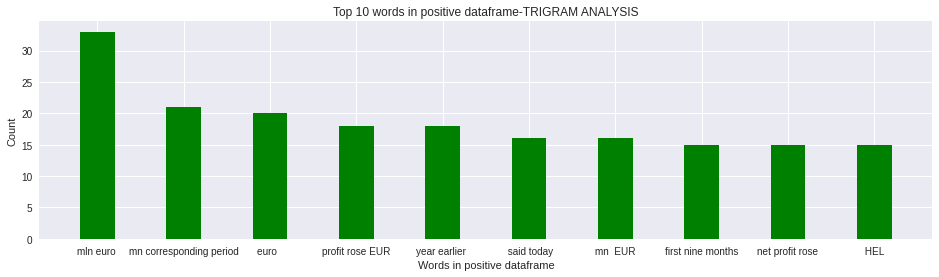

In [61]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

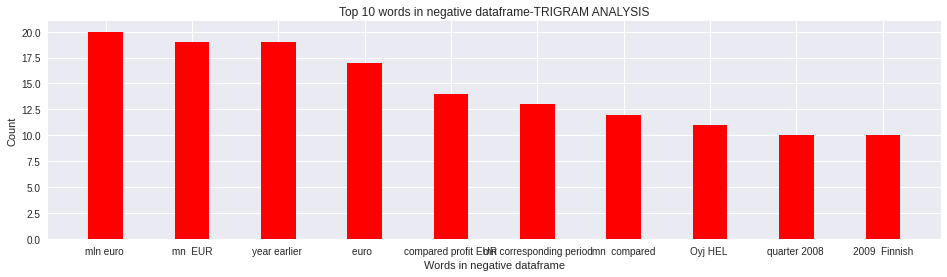

In [62]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

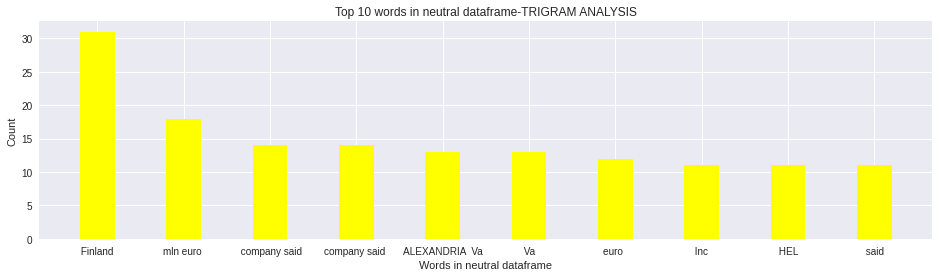

In [63]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()